<a href="https://colab.research.google.com/github/nyp-sit/agods/blob/main/day3/1.matplotlib_deepdrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='400'/>

Welcome to the lab! Before we get started here are a few pointers on using this notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.
    

# Matplotlib Deep Dive 

There are essentially two ways to use Matplotlib:
- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

## Pyplot Basics

pyplot contains a simpler interface for creating visualizations that allow the users to plot the data without explicitly configuring the Figure and Axes themselves. They are automatically configured to achieve the desired output. It is handy to use the alias plt to reference the imported submodule, as follows:

In [ ]:
%matplotlib inline 

import matplotlib.pyplot as plt

### Creating Figures

You can use plt.figure() to create a new Figure. This function returns a Figure instance, but it is also passed to the backend. Every Figure-related command that follows is applied to the current Figure and does not need to know the Figure instance.

By default, the Figure has a width of 6.4 inches and a height of 4.8 inches with a dpi (dots per inch) of 100. To change the default values of the Figure, we can use the parameters figsize and dpi.

The following code snippet shows how we can manipulate a Figure:

In [ ]:
#To change the width and the height
plt.figure(figsize=(10, 5))

#To change the dpi
plt.figure(dpi=300)

<Figure size 1920x1440 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

### Format Strings

You can use the a format string to specify colors, marker types, and line styles. A format string is specified as `[color][marker][line]`, where each item is optional. If the color argument is the only argument of the format string, you can use matplotlib.colors. 

Matplotlib recognizes the following formats, among others:
- RGB or RGBA float tuples (for example, `(0.2, 0.4, 0.3)` or `(0.2, 0.4, 0.3, 0.5)`)
- RGB or RGBA hex strings (for example, `'#0F0F0F'` or `'#0F0F0F0F'`)

The following table is an example of how a color can be represented in one particular format:

|Colors|Color|
|-----|-----|
|'b'|blue|
|'r'|red|
|'g'|green|
|'m'|magenta
|'c'|cyan|
|'k'|black|
|'w'|white|
|'y'|yellow|


All the available marker options are illustrated in the following figure:

<img src='https://github.com/nyp-sit/agods/blob/main/day3/images/markers.jpg?raw=1' width=60%/>

All the available line styles are illustrated in the following diagram. 

In general, solid lines should be used. We recommend restricting the use of dashed and dotted lines to either visualize some bounds/targets/goals or to depict uncertainty, for example, in a forecast:


<img src='https://github.com/nyp-sit/agods/blob/main/day3/images/line_style.jpg?raw=1' width=60%/>

To conclude, format strings are a handy way to quickly customize colors, marker types, and line styles. It is also possible to use arguments, such as color, marker, and linestyle.

## Plotting

With `plt.plot([x], y, [fmt])`, you can plot data points as lines and/or markers. 

The function returns a list of Line2D objects representing the plotted data. 

By default, if you do not provide a format string (fmt), the data points will be connected with straight, solid lines. 

Let's try to plot something with the format string.


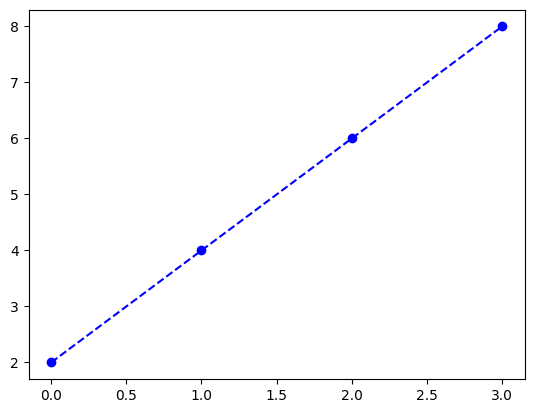

In [ ]:
# plot with blue color, x marker, connected by -- line
plt.plot([0,1,2,3], [2,4,6,8], 'ob--')

To plot multiple data pairs, the syntax `plt.plot([x], y, [fmt], [x], y2, [fmt2], …)` can be used. 

Similarly, you can use plt.plot multiple times, since we are working on the same Figure and Axes:

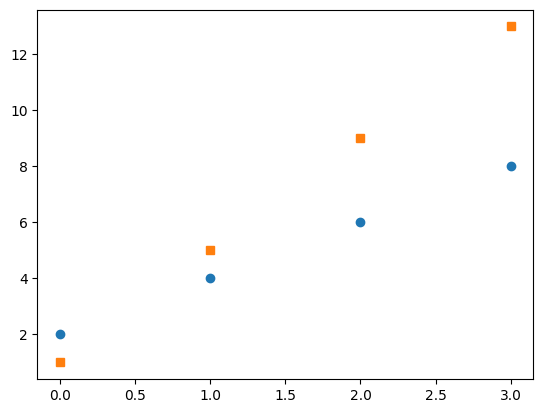

In [ ]:
plt.plot([2, 4, 6, 8], 'o') 
plt.plot([1, 5, 9, 13], 's')

Any [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) properties can be used instead of format strings to further customize the plot. 

For example, the following code snippet shows how we can additionally specify the `linewidth` and `markersize` arguments:

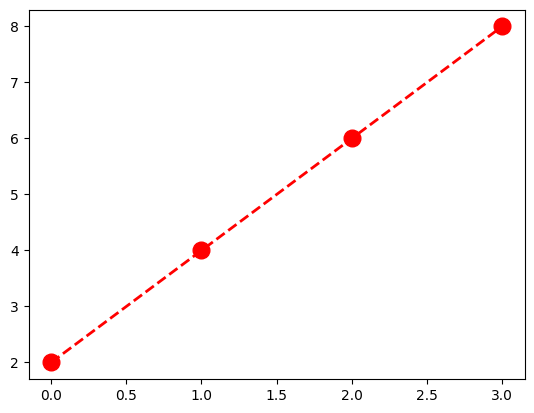

In [ ]:
plt.plot([2, 4, 6, 8], color='red', marker='o', \
         linestyle='dashed', linewidth=2, markersize=12)

### Plotting Using Pandas DataFrames

Besides numpy array, we can also use `pandas.DataFrame` as a data source. 

Instead of providing x and y values, you can provide the `pandas.DataFrame` in the `data` parameter and give keys for `x` and `y`, as follows:

In [ ]:
import pandas as pd

df = pd.DataFrame(
    { 'x_key': [0, 1, 2 ,3], 
      'y_key' : [ 2, 4, 6, 8 ]
    })

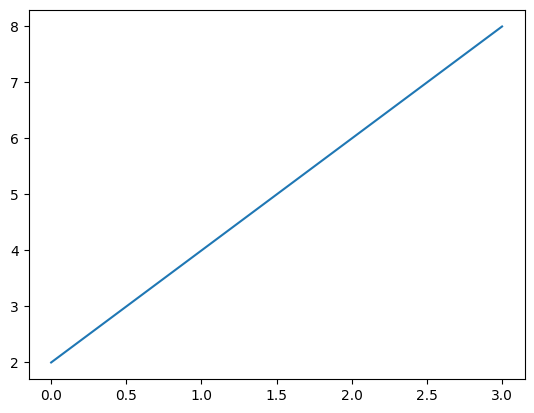

In [ ]:
plt.plot('x_key', 'y_key', data=df)

### Ticks

Tick locations and labels can be set manually if Matplotlib's default isn't sufficient. 

Considering the previous plot, it might be preferable to only have ticks at multiples of ones at the x-axis. One way to accomplish this is to use plt.xticks() and plt.yticks() to either get or set the ticks manually.

`plt.xticks(ticks, [labels], [**kwargs])` sets the current tick locations and labels of the x-axis.

`**kwargs (optional): matplotlib.text.Text()` properties can be used to customize the appearance of the tick labels. A quite useful property is rotation; this allows you to rotate the tick labels to use space more efficiently.

([<matplotlib.axis.XTick at 0x151ef6495e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

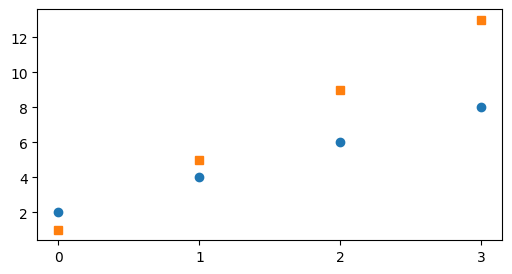

In [ ]:
import numpy as np

plt.figure(figsize=(6, 3))
plt.plot([2, 4, 6, 8], 'o', [1, 5, 9, 13], 's')
plt.xticks(ticks=np.arange(4))

It's also possible to specify tick labels, as follows:

([<matplotlib.axis.XTick at 0x151ef6e73d0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April')])

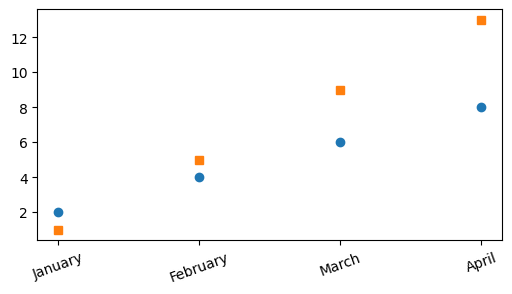

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot([2, 4, 6, 8], 'o', [1, 5, 9, 13], 's')
plt.xticks(ticks=np.arange(4), \
           labels=['January', 'February', 'March', 'April'], \
           rotation=20)

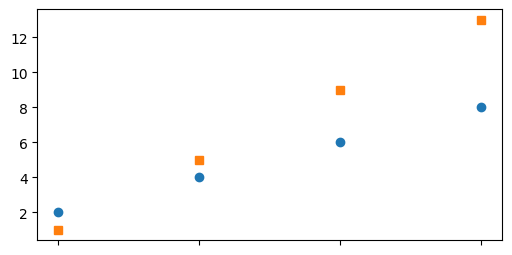

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot([2, 4, 6, 8], 'o', [1, 5, 9, 13], 's')
plt.xticks(ticks=np.arange(4), \
           labels=['January', 'February', 'March', 'April'], \
           rotation=20)


If you want to do even more sophisticated things with ticks, you should look into tick locators and formatters. 

For example, `ax.xaxis.set_major_locator(plt.NullLocator())` would remove the major ticks of the x-axis, and `ax.xaxis.set_major_formatter(plt.NullFormatter())` would remove the major tick labels, but not the tick locations of the x-axis.

Note: You can get the current axes by calling '`plt.gca()`, e.g. 

```python
ax = plt.gca()
```

### Displaying Figures

plt.show() is used to display a Figure or multiple Figures. To display Figures within a Jupyter Notebook, simply set the %matplotlib inline command at the beginning of the code.

If you forget to use plt.show(), the plot won't show up. We will learn how to save the Figure in the next section.

### Saving Figures
The `plt.savefig(fname)` saves the current Figure. 

There are some useful optional parameters you can specify, such as dpi, format, or transparent. The following code snippet gives an example of how you can save a Figure:

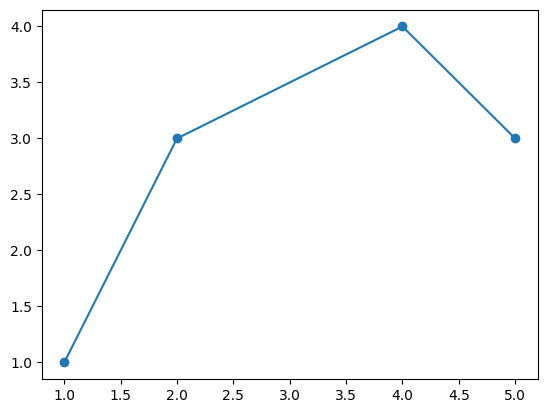

In [ ]:
plt.figure()
plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')

#bbox_inches='tight' removes the outer white margins
plt.savefig('lineplot.png', dpi=300, bbox_inches='tight')

## Basic Text and Legend Functions

All of the functions we discuss in this topic, except for the legend, create and return a matplotlib.text.Text() instance. We are mentioning it here so that you know that all of the properties discussed can be used for the other functions as well.

### Labels

Matplotlib provides a few label functions that we can use for setting labels to the `x-` and `y-axes`. The `plt.xlabel()` and `plt.ylabel()` functions are used to set the label for the current axes. The set_xlabel() and set_ylabel() functions are used to set the label for specified axes (the OO way of doing things)

### Titles

A title describes a particular chart/graph. The titles are placed above the axes in the center, left edge, or right edge. There are two options for titles – you can either set the Figure title or the title of an Axes. The suptitle() function sets the title for the current and specified Figure. The title() function helps in setting the title for the current and specified axes.

Text(0, 0.5, 'Y Label')

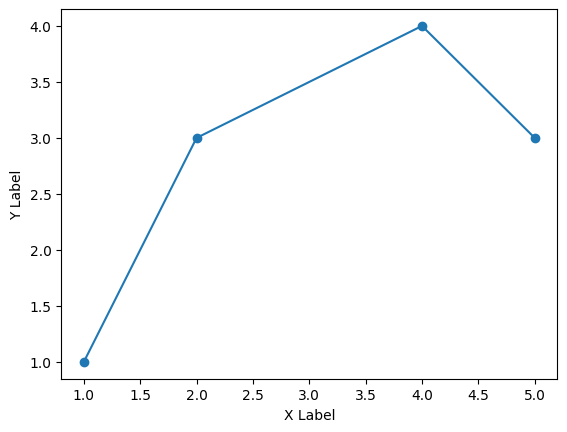

In [ ]:
# plt.figure()
# plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
# ax = plt.gca()
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')

# We can also get the axes when we create the figure
fig, ax  = plt.subplots()
ax.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

Titles
A title describes a particular chart/graph. The titles are placed above the axes in the center, left edge, or right edge. There are two options for titles – you can either set the Figure title or the title of an Axes. The suptitle() function sets the title for the current and specified Figure. The title() function helps in setting the title for the current and specified axes.

Text(0.5, 1.0, 'Title2')

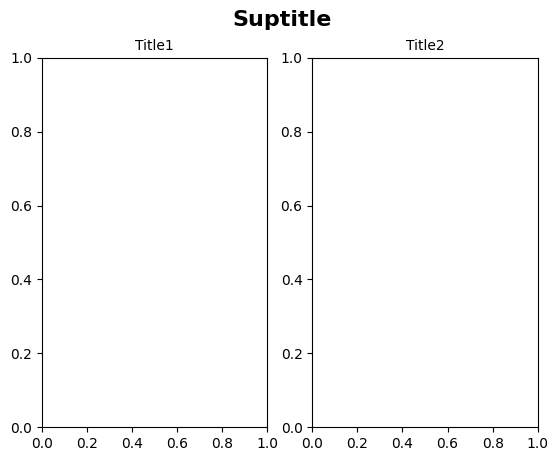

In [ ]:
fig, ax  = plt.subplots(1, 2)
fig.suptitle('Suptitle', fontsize=16, fontweight='bold')
ax[0].set_title('Title1', fontsize=10)
ax[1].set_title('Title2', fontsize=10)

### Text
There are two options for text – you can either add text to a Figure or text to an Axes. The figtext(x, y, text) and text(x, y, text) functions add text at locations x or y for a Figure.

Text(0, 0.5, 'text in figure')

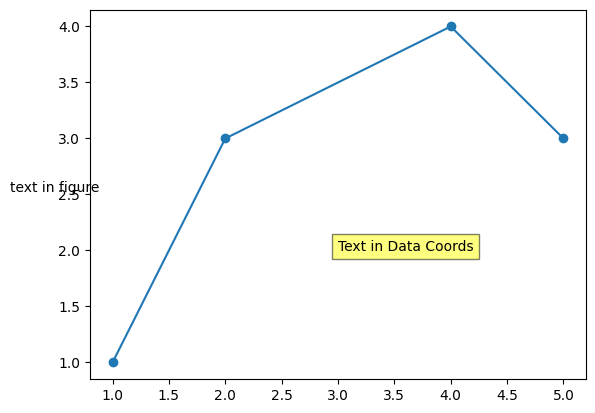

In [ ]:
fig, ax = plt.subplots() 
ax.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
ax.text(3, 2, 'Text in Data Coords', \
        bbox={'facecolor': 'yellow', 'alpha':0.5, 'pad':4})
fig.text(3, 0.5, "text in figure")

This creates a yellow text box with the text Text in Data Coords.

### Annotation 

Compared to text that is placed at an arbitrary position on the Axes, annotations are used to annotate some features of the plot. In annotations, there are two locations to consider: the annotated location, xy, and the location of the annotation, text `xytext`. It is useful to specify the parameter `arrowprops`, which results in an arrow pointing to the annotated location.

Text(2, 4, 'max value')

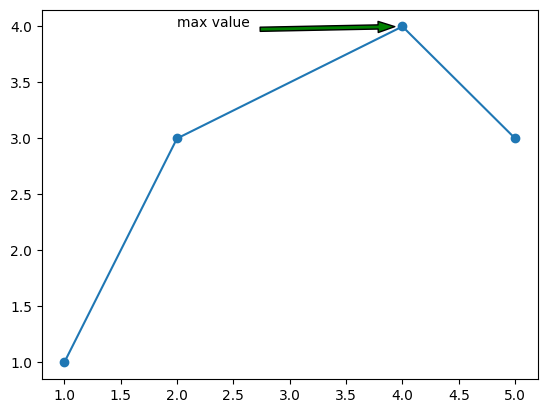

In [ ]:
fig, ax = plt.subplots() 
ax.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
ax.annotate('max value', xy=(4,4), \
            xytext=(2,4), \
            arrowprops=dict(facecolor='green', width=3, headwidth=8, shrink=0.05))

### Legends

Legend describes the content of the plot. To add a legend to your Axes, we have to specify the label parameter at the time of plot creation. 
`Calling plt.legend()` for the current Axes or `Axes.legend()` for a specific Axes will add the legend. 
The `loc` parameter specifies the location of the legend.

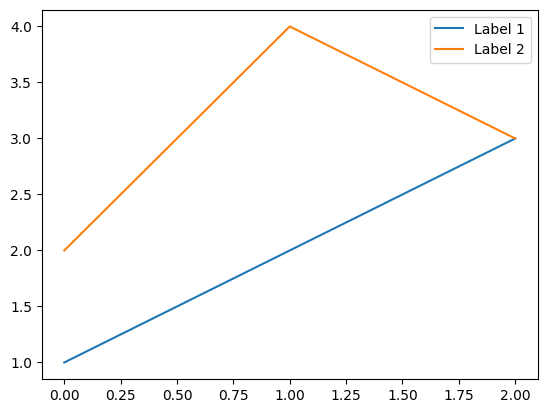

In [ ]:
plt.plot([1, 2, 3], label='Label 1')
plt.plot([2, 4, 3], label='Label 2')
plt.legend()

### Exercise

In this activity, we will create a line plot to show stock trends. The aim of this activity is to not just visualize the data but to use labels, a title, and a legend to make the visualization self-explanatory and "complete."

Let's look at the following scenario: you are interested in investing in stocks. You downloaded the stock prices for the "big five": Amazon, Google, Apple, Facebook, and Microsoft. You want to visualize the closing prices in dollars to identify trends. This dataset is available in the Datasets folder that you had downloaded initially. The following are the steps to perform:

1. Import the necessary modules and enable plotting within a Jupyter Notebook.
2. Use pandas to read the datasets (GOOGL_data.csv, FB_data.csv, AAPL_data.csv, AMZN_data.csv, and MSFT_data.csv) located in the Datasets folder. The read_csv() function reads a .csv file into a DataFrame.
3. Use Matplotlib to create a line chart visualizing the closing prices for the past 5 years (whole data sequence) for all five companies. Add labels, titles, and a legend to make the visualization self-explanatory. Use plt.grid() to add a grid to your plot. If necessary, adjust the ticks in order to make them readable.
Your expected output should look like this: 

<img src='https://github.com/nyp-sit/agods/blob/main/day3/images/ex1_output.png?raw=1' width=60% />


Text(0.5, 1.0, 'Stock Trend')

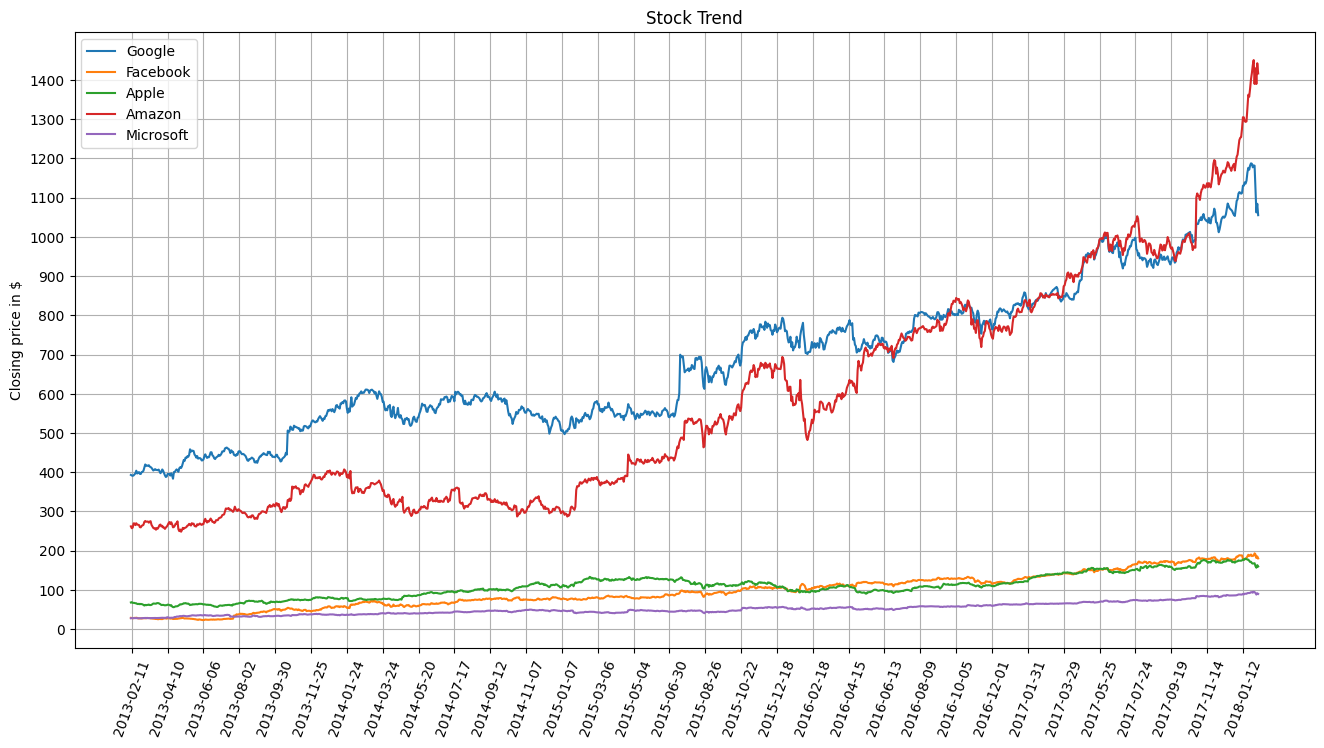

In [ ]:
### TODO: code here 

import matplotlib.pyplot as plt
import pandas as pd 

# Step 2: Read the datasets
google_df = pd.read_csv('datasets/GOOGL_data.csv')
apple_df = pd.read_csv('datasets/AAPL_data.csv')
microsoft_df = pd.read_csv('datasets/MSFT_data.csv')
amazon_df = pd.read_csv('datasets/AMZN_data.csv')
facebook_df = pd.read_csv('datasets/FB_data.csv')

# Step 3: create a line chart 
plt.figure(figsize=(16, 8))
plt.plot('date', 'close', data=google_df, label='Google')
plt.plot('date', 'close', data=facebook_df, label='Facebook')
plt.plot('date', 'close', data=apple_df, label='Apple')
plt.plot('date', 'close', data=amazon_df, label='Amazon')
plt.plot('date', 'close', data=microsoft_df, label='Microsoft')
plt.xticks(np.arange(1, 1260, 40), rotation=70)
plt.yticks(np.arange(0, 1450, 100))
plt.legend()
plt.grid()
plt.ylabel("Closing price in $")
plt.title('Stock Trend')

### Solution 

Click on the '...' below to see the solution.

Text(0.5, 1.0, 'Stock Trend')

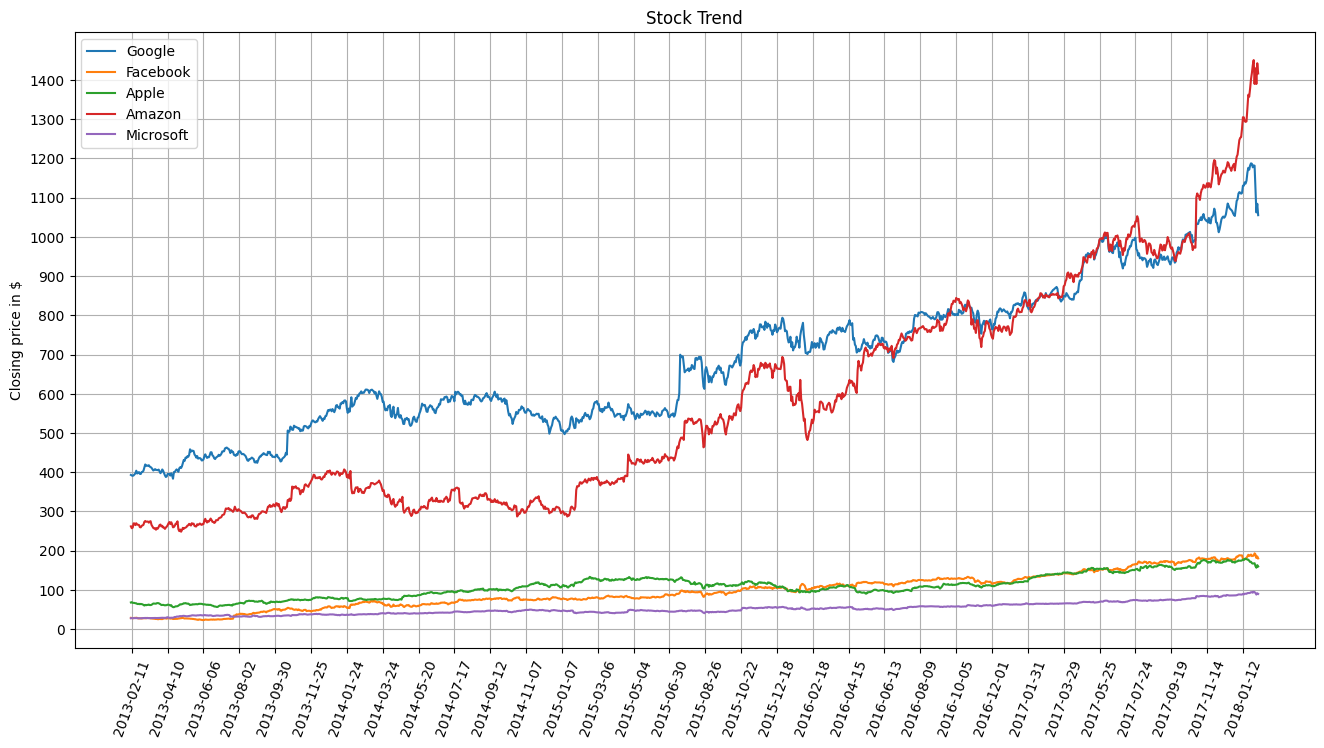

In [ ]:
# SOLUTION
import matplotlib.pyplot as plt
import pandas as pd 

# Step 2: Read the datasets
google_df = pd.read_csv('datasets/GOOGL_data.csv')
apple_df = pd.read_csv('datasets/AAPL_data.csv')
microsoft_df = pd.read_csv('datasets/MSFT_data.csv')
amazon_df = pd.read_csv('datasets/AMZN_data.csv')
facebook_df = pd.read_csv('datasets/FB_data.csv')

# Step 3: create a line chart 
plt.figure(figsize=(16, 8))
plt.plot('date', 'close', data=google_df, label='Google')
plt.plot('date', 'close', data=facebook_df, label='Facebook')
plt.plot('date', 'close', data=apple_df, label='Apple')
plt.plot('date', 'close', data=amazon_df, label='Amazon')
plt.plot('date', 'close', data=microsoft_df, label='Microsoft')
plt.xticks(np.arange(1, 1260, 40), rotation=70)
plt.yticks(np.arange(0, 1450, 100))
plt.legend()
plt.grid()
plt.ylabel("Closing price in $")
plt.title('Stock Trend')
